In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


Update the pcn.py using Keras MLP model, and do the following tasks:
1.1 Demonstrate your Pima Results Here (Cycles, Accuracy)
1.2 Compare the batch training and sequential (single-instance) training.


In [0]:
# updating using keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [0]:
import keras.callbacks as cb
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def plot_losses(history):
    plt.figure(1, figsize=(10,10)) 
    plt.subplot(211)   # 2 by 1 array of subplots, and draw the first one 
    plt.plot(history['loss'])   
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='upper right')
	
    plt.subplot(212)   # 2 by 1 array of subplots, and draw the second one 
    plt.plot(history['acc'])  
    plt.title('model accuracy')  
    plt.ylabel('acc')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='lower right')  
	
    plt.show()   

class Solution():
  def __init__(self,X_train,y_train, X_test=None, y_test=None):
    #shape = y_train.shape
    #(self.rows,self.c) = shape
    #y_train = np_utils.to_categorical(y_train, self.rows)

    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    #print('X_train:\n',self.X_train) #debug
    print('train X shape',self.X_train.shape) #debug
    #print('Y_train:\n',self.y_train) #debug
    print('train Y shape',self.y_train.shape) #debug

  def init_model(self):
    model = Sequential()
    model.add(Dense(10, input_dim=8))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    self.model = model
    return model
  
  def run_network(self, epochs=20, batch=1):
    try:
      if self.model is None:
            self.model = init_model()
      history = LossHistory()
      history = self.model.fit( 
                                self.X_train, self.y_train,
                                epochs=epochs,batch_size=batch,
                                callbacks=[history],
                                verbose=1
                               )
      return history.history

    except KeyboardInterrupt:
        print (' KeyboardInterrupt')
        return model, history.losses

In [4]:
import numpy as np
from matplotlib import pyplot as plt

pima = np.loadtxt('./pima-indians-diabetes.data',delimiter=',')

# Various preprocessing steps
pima[np.where(pima[:,0]>8),0] = 8

pima[np.where(pima[:,7]<=30),7] = 1
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

pima[:,:8] = pima[:,:8]-pima[:,:8].mean(axis=0)
pima[:,:8] = pima[:,:8]/pima[:,:8].var(axis=0)

trainin = pima[::2,:8]
testin = pima[1::2,:8]
traintgt = pima[::2,8:9]
testtgt = pima[1::2,8:9]
print(trainin.shape)
print(testin.shape)
print(traintgt.shape)
print(testtgt.shape)

pima_solution = Solution(trainin,traintgt,testin,testtgt)

pima_solution.init_model()
import time
start_time = time.time()
history = pima_solution.run_network(epochs=20, batch=1)
print("--- %s seconds ---" % (time.time() - start_time))
#print(losses)
plot_losses(history)


OSError: ignored

3. Run the pcn.py to the learning OR mapping problem (as shown in the following picture), choose the parameters (e.g. epochs) to find the best result you can.  
![](https://i.imgur.com/2NOHAdF.png)

In [0]:
# updating using keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.callbacks as cb
from matplotlib import pyplot as plt
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def plot_losses(history):
    plt.figure(1, figsize=(10,10)) 
    plt.subplot(211)   # 2 by 1 array of subplots, and draw the first one 
    plt.plot(history['loss'])   
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='upper right')
	
    plt.subplot(212)   # 2 by 1 array of subplots, and draw the second one 
    plt.plot(history['acc'])  
    plt.title('model accuracy')  
    plt.ylabel('acc')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='lower right')  
	
    plt.show()   

class Solution():
  def __init__(self,X_train,y_train, X_test=None, y_test=None):
    #shape = y_train.shape
    #(self.rows,self.c) = shape
    #y_train = np_utils.to_categorical(y_train, self.rows)

    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    #print('X_train:\n',self.X_train) #debug
    print('train X shape',self.X_train.shape) #debug
    #print('Y_train:\n',self.y_train) #debug
    print('train Y shape',self.y_train.shape) #debug

  def init_model(self):
    model = Sequential()
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    self.model = model
    return model
  
  def run_network(self, epochs=20, batch=1):
    try:
      if self.model is None:
            self.model = init_model()
      history = LossHistory()
      history = self.model.fit( 
                                self.X_train, self.y_train,
                                epochs=epochs,batch_size=batch,
                                callbacks=[history],
                                verbose=1
                               )
      return history.history

    except KeyboardInterrupt:
        print (' KeyboardInterrupt')
        return model, history.losses

In [0]:
import numpy as np
data = np.array([[0,0,0,0],[0,1,0,1],[1,0,1,0],[1,1,1,1]])
X_train = data[:,0:2]
y_train = data[:,2:]

train X shape (4, 2)
train Y shape (4, 2)
Epoch 1/200
4/4 [==============================] - 0s 104ms/step - loss: 0.7054 - acc: 0.7500
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7021 - acc: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6998 - acc: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6979 - acc: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6962 - acc: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6948 - acc: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6932 - acc: 0.5000
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6918 - acc: 0.5000
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6904 - acc: 0.5000
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6890 - acc: 0.5000
Epoch 11/200
4/4 [=================

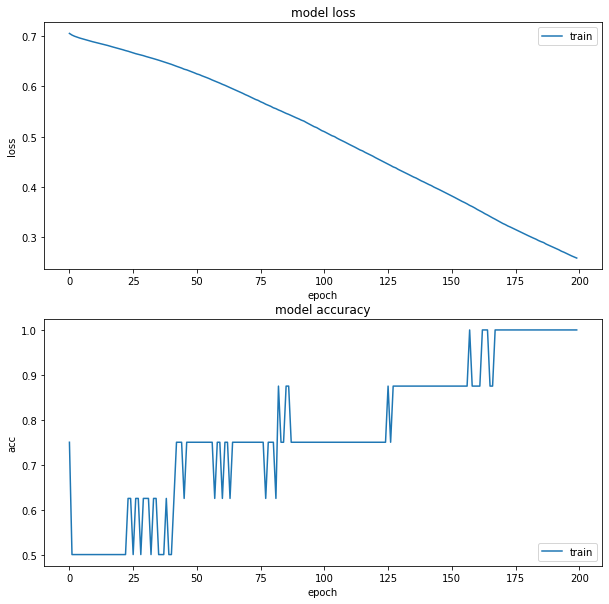

In [39]:
self_maping_solution = Solution(X_train, y_train)

self_maping_solution.init_model()
import time
start_time = time.time()
history = self_maping_solution.run_network(epochs=200, batch=1)
print("--- %s seconds ---" % (time.time() - start_time))
#print(losses)
plot_losses(history)

In [0]:
import pcn
import numpy as np
data = np.array([[0,0,0,0],[0,1,0,1],[1,0,1,0],[1,1,1,1]])
X_train = data[:,0:2]
y_train = data[:,2:]
p = pcn.pcn(X_train,y_train)
p.pcntrain(X_train,y_train,0.1,7) # inputs,targets,eta,nIterations
p.confmat(X_train,y_train) #Confusion matrix 混淆矩陣
p.plotErr(1)

ModuleNotFoundError: ignored

3. Run the pcn.py to the learning OR mapping problem (as shown in the following picture), choose the parameters (e.g. epochs) to find the best result you can.  
 
x1  x2  Output

0    0     0

0    1     1

1     0    1

1     1     1



In [0]:
import numpy as np
data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
X_train = data[:,0:2]
y_train = data[:,2:]

In [0]:
# updating using keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.callbacks as cb
from matplotlib import pyplot as plt
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def plot_losses(history):
    plt.figure(1, figsize=(10,10)) 
    plt.subplot(211)   # 2 by 1 array of subplots, and draw the first one 
    plt.plot(history['loss'])   
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='upper right')
	
    plt.subplot(212)   # 2 by 1 array of subplots, and draw the second one 
    plt.plot(history['acc'])  
    plt.title('model accuracy')  
    plt.ylabel('acc')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='lower right')  
	
    plt.show()   

class Solution():
  def __init__(self,X_train,y_train, X_test=None, y_test=None):
    #shape = y_train.shape
    #(self.rows,self.c) = shape
    #y_train = np_utils.to_categorical(y_train, self.rows)

    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    #print('X_train:\n',self.X_train) #debug
    print('train X shape',self.X_train.shape) #debug
    #print('Y_train:\n',self.y_train) #debug
    print('train Y shape',self.y_train.shape) #debug

  def init_model(self):
    model = Sequential()
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    self.model = model
    return model
  
  def run_network(self, epochs=20, batch=1):
    try:
      if self.model is None:
            self.model = init_model()
      history = LossHistory()
      history = self.model.fit( 
                                self.X_train, self.y_train,
                                epochs=epochs,batch_size=batch,
                                callbacks=[history],
                                verbose=1
                              )
      return history.history

    except KeyboardInterrupt:
        print (' KeyboardInterrupt')
        return model, history.losses

train X shape (4, 2)
train Y shape (4, 1)
Epoch 1/200
4/4 [==============================] - 0s 46ms/step - loss: 0.6958 - acc: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6790 - acc: 0.7500
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6682 - acc: 0.7500
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6591 - acc: 0.7500
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6505 - acc: 0.7500
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6423 - acc: 0.7500
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6347 - acc: 0.7500
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6270 - acc: 0.7500
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6197 - acc: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6125 - acc: 0.7500
Epoch 11/200
4/4 [==================

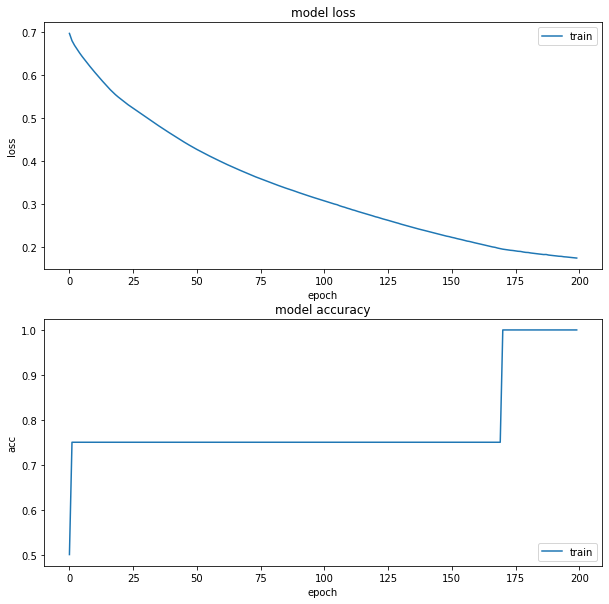

In [10]:
or_solution = Solution(X_train, y_train)

or_solution.init_model()
import time
start_time = time.time()
history = or_solution.run_network(epochs=200, batch=1)
print("--- %s seconds ---" % (time.time() - start_time))
#print(losses)
plot_losses(history)

Error: 3
Error: 1
Error: 1
Error: 1
Error: 0
Error: 0
Error: 0
Confusion matrix
[[1. 0.]
 [0. 3.]]
acc
1.0


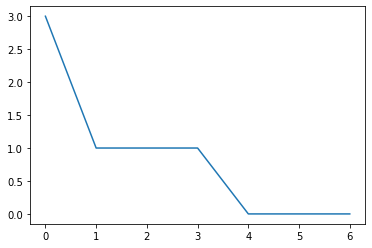

In [0]:
import pcn
import numpy as np
data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
X_train = data[:,0:2]
y_train = data[:,2:]
p = pcn.pcn(X_train,y_train)
p.pcntrain(X_train,y_train,0.1,7) # inputs,targets,eta,nIterations
p.confmat(X_train,y_train) #Confusion matrix 混淆矩陣
p.plotErr(1)

4. Run the pcn.py to the learning XOR mapping problem (as shown in the following picture), choose the parameters (e.g. epochs) to find the best result you can.  

x1  x2  Output

0    0     0

0    1     1

1     0    1

1     1     0



In [0]:
import numpy as np
data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X_train = data[:,0:2]
y_train = data[:,2:]

In [0]:
# updating using keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.callbacks as cb
from matplotlib import pyplot as plt
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def plot_losses(history):
    plt.figure(1, figsize=(10,10)) 
    plt.subplot(211)   # 2 by 1 array of subplots, and draw the first one 
    plt.plot(history['loss'])   
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='upper right')
	
    plt.subplot(212)   # 2 by 1 array of subplots, and draw the second one 
    plt.plot(history['acc'])  
    plt.title('model accuracy')  
    plt.ylabel('acc')  
    plt.xlabel('epoch')  
    plt.legend(['train'], loc='lower right')  
	
    plt.show()   

class Solution():
  def __init__(self,X_train,y_train, X_test=None, y_test=None):
    #shape = y_train.shape
    #(self.rows,self.c) = shape
    #y_train = np_utils.to_categorical(y_train, self.rows)

    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    #print('X_train:\n',self.X_train) #debug
    print('train X shape',self.X_train.shape) #debug
    #print('Y_train:\n',self.y_train) #debug
    print('train Y shape',self.y_train.shape) #debug

  def init_model(self):
    model = Sequential()
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))
    model.add(Dense(10, input_dim=2))
    model.add(Activation('relu'))
   
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    self.model = model
    return model
  
  def run_network(self, epochs=20, batch=1):
    try:
      if self.model is None:
            self.model = init_model()
      history = LossHistory()
      history = self.model.fit( 
                                self.X_train, self.y_train,
                                epochs=epochs,batch_size=batch,
                                callbacks=[history],
                                verbose=1
                               )
      return history.history

    except KeyboardInterrupt:
        print (' KeyboardInterrupt')
        return model, history.losses

train X shape (4, 2)
train Y shape (4, 1)
Epoch 1/200
4/4 [==============================] - 0s 125ms/step - loss: 0.6968 - acc: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6938 - acc: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6919 - acc: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6906 - acc: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6896 - acc: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6891 - acc: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6882 - acc: 0.5000
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6869 - acc: 0.5000
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6859 - acc: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6848 - acc: 0.5000
Epoch 11/200
4/4 [=================

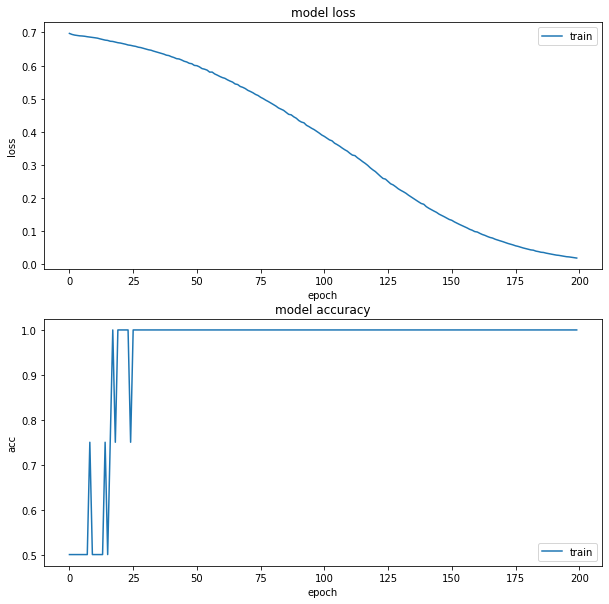

In [25]:
xor_solution = Solution(X_train, y_train)

xor_solution.init_model()
import time
start_time = time.time()
history = xor_solution.run_network(epochs=200, batch=1)
print("--- %s seconds ---" % (time.time() - start_time))
#print(losses)
plot_losses(history)

Error: 1
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Error: 2
Confusion matrix
[[2. 2.]
 [0. 0.]]
acc
0.5


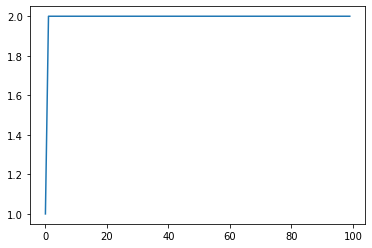

In [0]:
import pcn
import numpy as np
data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X_train = data[:,0:2]
y_train = data[:,2:]
p = pcn.pcn(X_train,y_train)
p.pcntrain(X_train,y_train,.1,100) # inputs,targets,eta,nIterations
p.confmat(X_train,y_train) #Confusion matrix 混淆矩陣
p.plotErr(1)